# EDA of Amazon Fine Food Reviews

In [1]:
import numpy as np
import pandas as pd

In [2]:
import nltk

In [3]:
# Read from Dave's file directory
df = pd.read_csv('~/.kaggle/datasets/snap/amazon-fine-food-reviews/Reviews.csv', encoding='utf8')
# Read from Matt's file directory
# df = pd.read_csv('/home/matt/W266Final/Reviews.csv', encoding='utf8')


df = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary'], axis=1)

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
# Not not to Matt: I kept timing out here, does this work correclty for you?
df['Tokens'] = df['Text'].apply(lambda text: word_tokenize(text))
df['Tokens_Len'] = df['Tokens'].apply(lambda tokens: len(tokens))

In [6]:
import matplotlib as plt
%matplotlib inline

### Statistics

Number of reviews:

In [8]:
df.shape[0]

568454

Number of reviews for each score:

In [31]:
counts_df = df.groupby(['Score']).agg('count')
counts_df

,Text,Tokens,Tokens_Len
Score,,,
1,52268,52268,52268
2,29769,29769,29769
3,42640,42640,42640
4,80655,80655,80655
5,363122,363122,363122


Text(0,0.5,'Number of Reviews')

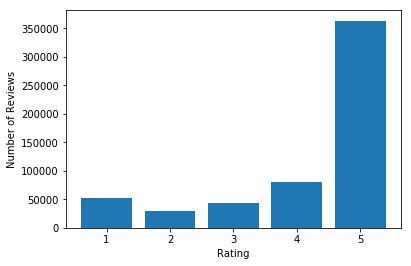

In [30]:
plt.pyplot.bar(x=counts_df.index, height=counts_df.Text)
plt.pyplot.xlabel('Rating')
plt.pyplot.ylabel('Number of Reviews')

This chart shows that there is an imbalance in the number of reviews written for ratings that are  given a 5.

### Show Histogram of Review Lengths

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6501d959e8>]],
      dtype=object)

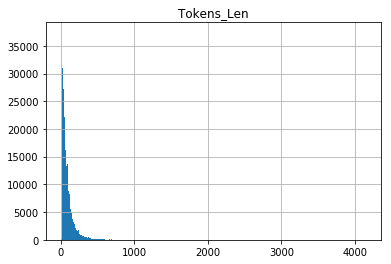

In [9]:
df.hist(column='Tokens_Len', bins=1000)

This chart shows that the length of reviews follows the power law (Zipf's Law).

### Find Largest Review

In [10]:
largest_review = df['Tokens_Len'].max()
largest_review

4141

View Text of Largest Review

In [11]:
df_largest_reviews = df.loc[df['Tokens_Len']==largest_review]
df_largest_reviews = df_largest_reviews.reset_index(drop=True)
df_largest_reviews.loc[0,'Text']

'Fuzzy Wuzzy\'s Summary:<br />*** Somewhat recommended, with reservations and only lukewarm fuzzies.<br /><br />Positives:<br /><br />+ Not too expensive compared to other bottled water, although it is not cheap either.<br /><br />Negatives:<br /><br />- This bottled water product\'s labeling, product descriptions, and health claims are misleading.<br /><br />At first glance, this 1.5-liter bottle of water that I am reviewing looks like another one of the many varieties of bottled water on the market.  There are many kinds of bottled water: "spring water" produced from an underground formation where the groundwater naturally flows up to the Earth\'s surface, "artesian water" obtained from a well that taps into an underground aquifer, "mineral water" produced from a well or spring that naturally contains trace amounts of minerals that some people consider to provide health benefits, "ground/well water" produced from a well that tapes into an aquifer, "sparkling water" from a spring or w

### Find Average Review

In [32]:
round(df['Tokens_Len'].mean())

96

### Find Token Count of 95% of Reviews

In [13]:
# Group by token length and create a column for the count
df2 = df.groupby('Tokens_Len').size().reset_index(name='counts')

# Normalize by the total count
total_counts = df2['counts'].sum()

# Sort by token length
df2 = df2.sort_values('Tokens_Len', ascending=True)

In [14]:
from __future__ import division
df2['percentage'] = df2['counts'].apply(lambda count: count/total_counts)

In [15]:
total_percentage = 0.0
review_limit = 0

for index, row in df2.iterrows():
    total_percentage = total_percentage + row['percentage']
    if total_percentage >= 0.95:
        print('The token length for 95% is: {}'.format(row['Tokens_Len']))
        review_limit = row['Tokens_Len']
        break

The token length for 95% is: 267.0


### Remove Reviews Longer than 95% of Reviews

In [16]:
df = df[df['Tokens_Len']<= review_limit]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6503a45470>]],
      dtype=object)

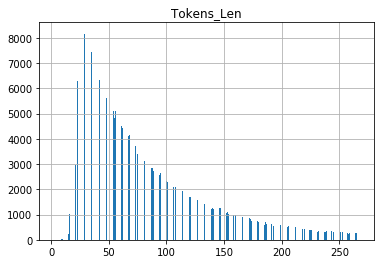

In [17]:
df.hist(column='Tokens_Len', bins=1000)